# Exploritary data analysis

##### Author: Daniel Hutsuliak

## Data exploration

Importing libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Let's take a look at the structure of the dataset.

In [2]:
os.listdir('dataset')

['airbus-ship-detection.zip',
 'sample_submission_v2.csv',
 'test_v2',
 'train_ship_segmentations_v2.csv',
 'train_v2']

Let's write the names of images for the training and test dataset into variables.

In [3]:
test_img_titles = os.listdir('dataset/test_v2')
train_img_titles = os.listdir('dataset/train_v2')

Reading train and example submissions .csv files to look at the structure of the dataframe:

In [4]:
train = pd.read_csv('dataset/train_ship_segmentations_v2.csv')
submission_example = pd.read_csv('dataset/sample_submission_v2.csv')

Now let's look at the structure of the training and submission files.

In [5]:
submission_example.head()

,ImageId,EncodedPixels
0,00002bd58.jpg,1 2
1,00015efb6.jpg,1 2
2,00023d5fc.jpg,1 2
3,000367c13.jpg,1 2
4,0008ca6e9.jpg,1 2


In [6]:
submission_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15606 entries, 0 to 15605
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        15606 non-null  object
 1   EncodedPixels  15606 non-null  object
dtypes: object(2)
memory usage: 244.0+ KB


In [7]:
train.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231723 entries, 0 to 231722
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        231723 non-null  object
 1   EncodedPixels  81723 non-null   object
dtypes: object(2)
memory usage: 3.5+ MB


Now lets see the class balance if we mark with label '1' those rows that have non-null value for 'EncodedPixels' column and '0' for null values of this column.

In [9]:
train['class'] = train['EncodedPixels'].fillna(0).apply(lambda x: 0 if x == 0 else 1)
train.head(6)

,ImageId,EncodedPixels,class
0,00003e153.jpg,NaN,0
1,0001124c7.jpg,NaN,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,1
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,1
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...,1


In [10]:
train[['ImageId', 'class']].groupby('ImageId').apply(np.mean)['class'].value_counts(normalize=True)

0.0    0.778994
1.0    0.221006
Name: class, dtype: float64

As we can see, we have disbalanced dataset. About 78% of images don't contain ships. We can now speculate on what validation methods we might use. I think I should use statified split by 'class' feature to train a model correctly.

Next I want to know image parameters.

In [12]:
img = plt.imread("dataset/train_v2/" + "00bc708e0.jpg") #+ str(train['ImageId'].iloc[2]))
img.shape

(768, 768, 3)

Let's check if all the pictures in test dataset have the same width and height in pixels. We will check it only on the test set because the train dataset has too many images. I think we can say that the images have the same size even if we look only at the test dataset.

In [14]:
one_shape = img.shape

for image_title in test_img_titles:
    try:
        img_shape = plt.imread("dataset/test_v2/" + str(image_title)).shape
        if one_shape != img_shape:
            print("Images are not the same size!")
            break
    except:
        print(f"There is a problem with image {image_title}!")

As we can see, all the images have the same size: 768x768x3.

Now let's check how the image mask looks. For example we will take the image with title '000155de5.jpg' from the train dataset because we know that it containes a ship. As we could read from overview of kaggle competition, pixels are one-indexed
and numbered from top to bottom, then left to right, so we must remember it while writing a code for creating masks for images! We will just transpose a result matrix to change an order of indexing.

In [15]:
def create_mask(pixel_sequence, image_size=(768, 768)):
    image_length = image_size[0]*image_size[1] #define image length in pixels
    mask = np.zeros(image_length, dtype=np.bool) #create empty mask
    for start, length in pixel_sequence: #for each pair in sequence of index and length
        mask[start:start + length] = 1 #change colour for pixels from sequence

    return mask.reshape(image_size).transpose() #return reshaped transposed mask for image

In [16]:
img = plt.imread("dataset/train_v2/" + str(train['ImageId'].iloc[2]))

In [17]:
enc_pxls_array = np.array(train['EncodedPixels'].iloc[2].split(' ')).astype(int) #create array with index-length values of pixel sequences
enc_pxls_array = enc_pxls_array.reshape((int(len(enc_pxls_array)/2), 2)) #reshape it for right 'create_mask' function work
enc_pxls_array

array([[264661,     17],
       [265429,     33],
       [266197,     33],
       [266965,     33],
       [267733,     33],
       [268501,     33],
       [269269,     33],
       [270037,     33],
       [270805,     33],
       [271573,     33],
       [272341,     33],
       [273109,     33],
       [273877,     33],
       [274645,     33],
       [275413,     33],
       [276181,     33],
       [276949,     33],
       [277716,     34],
       [278484,     34],
       [279252,     33],
       [280020,     33],
       [280788,     33],
       [281556,     33],
       [282324,     33],
       [283092,     33],
       [283860,     33],
       [284628,     33],
       [285396,     33],
       [286164,     33],
       [286932,     33],
       [287700,     33],
       [288468,     33],
       [289236,     33],
       [290004,     33],
       [290772,     33],
       [291540,     33],
       [292308,     33],
       [293076,     33],
       [293844,     33],
       [294612,     33],


In [18]:
mask = create_mask(enc_pxls_array)
mask.shape

(768, 768)

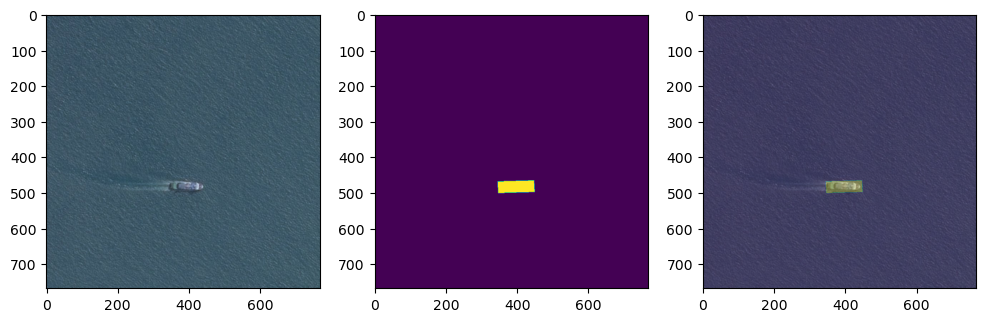

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].imshow(img)
axs[1].imshow(mask)
axs[2].imshow(img, alpha=1)
axs[2].imshow(mask, alpha=0.3);

To be sure that we wrote the 'create_mask' function correctly, we will show some more images with ships, their masks and resulting picture with mask and the ship image:

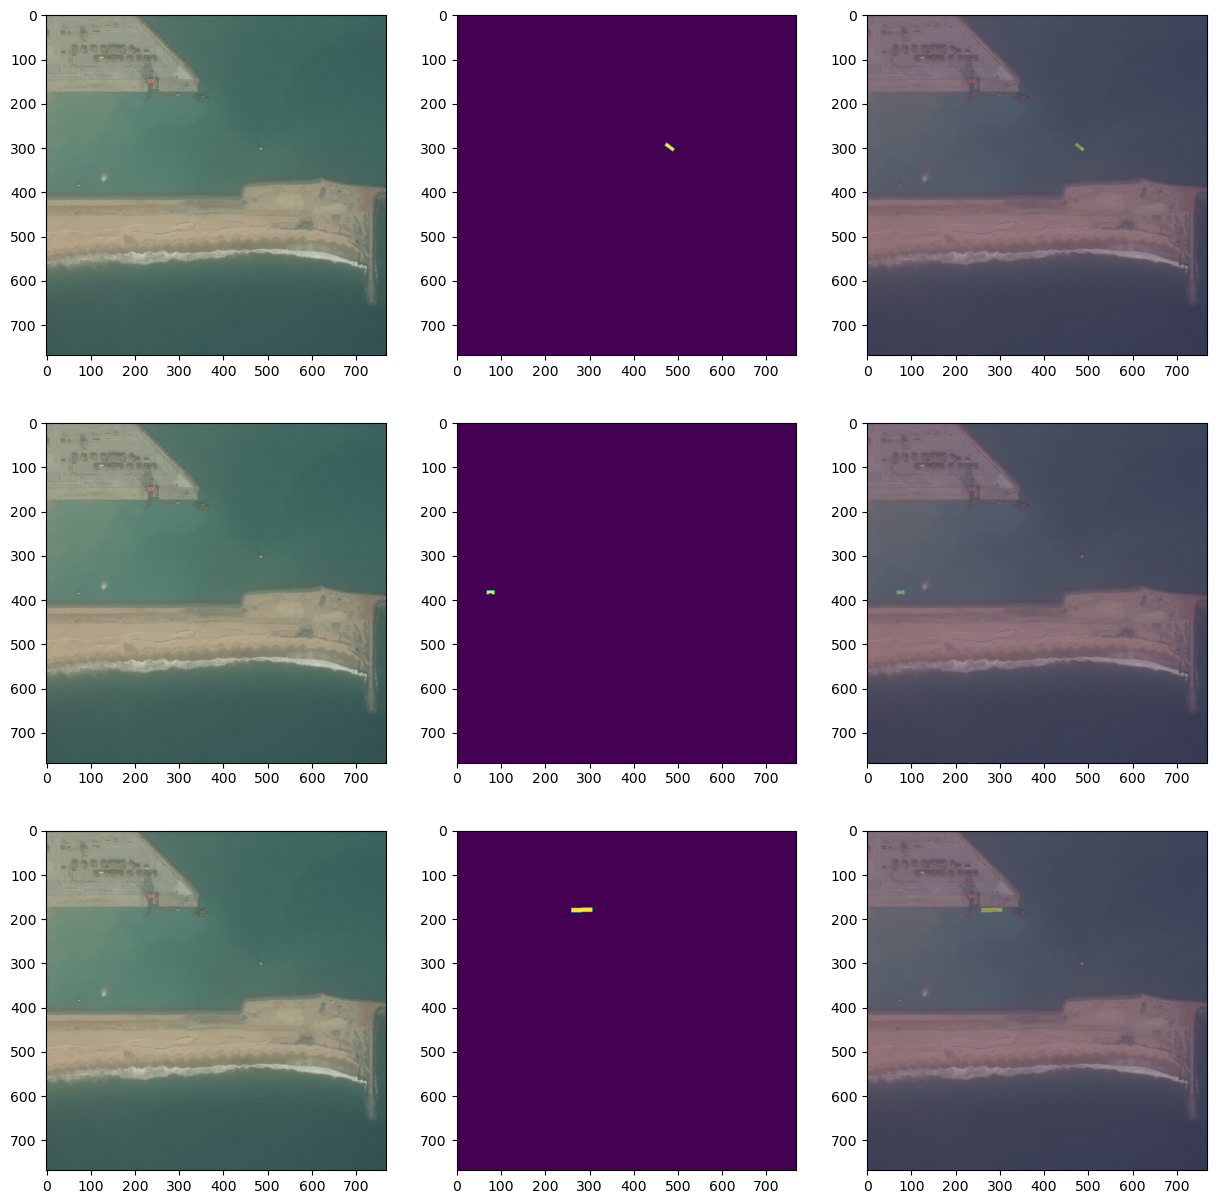

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for index in range(3, 6):
    img = plt.imread("dataset/train_v2/" + str(train['ImageId'].iloc[index])) #read image
    enc_pxls_array = np.array(train['EncodedPixels'].iloc[index].split(' ')).astype(int) #create array with index-length values of pixel
    enc_pxls_array = enc_pxls_array.reshape((int(len(enc_pxls_array)/2), 2)) #reshape it for right 'create_mask' function work
    mask = create_mask(enc_pxls_array)
    
    axs[index - 3][0].imshow(img)
    axs[index - 3][1].imshow(mask)
    axs[index - 3][2].imshow(img, alpha=1)
    axs[index - 3][2].imshow(mask, alpha=0.3);

So now we are sure, that our function works well!

Now let's take a look how we can combine masks for one image if it containes more than 1 ship. It would be useful to prepare our dataset for model training. We will take 3 pictures from previous example.

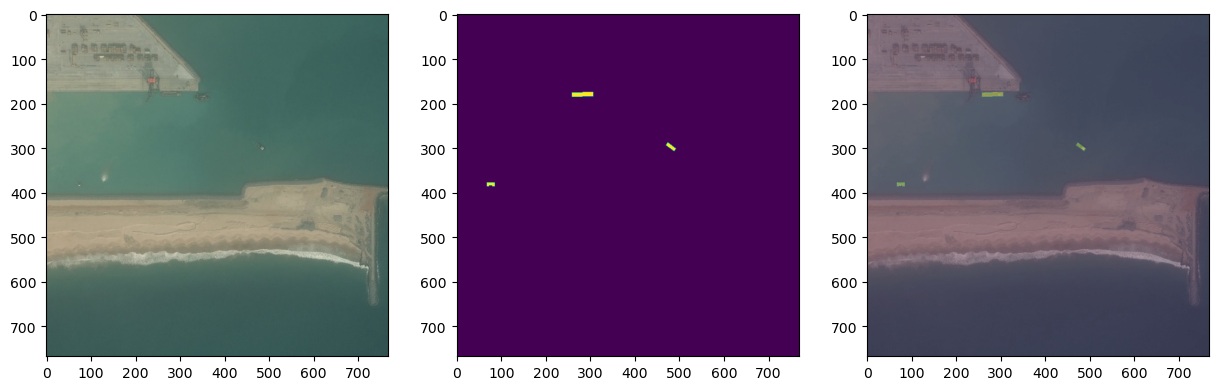

In [21]:
mask = np.zeros((768, 768))

for index in range(3, 6):
    img = plt.imread("dataset/train_v2/" + str(train['ImageId'].iloc[index])) #read image
    enc_pxls_array = np.array(train['EncodedPixels'].iloc[index].split(' ')).astype(int) #create array with index-length values of pixel
    enc_pxls_array = enc_pxls_array.reshape((int(len(enc_pxls_array)/2), 2)) #reshape it for right 'create_mask' function work
    mask_ = create_mask(enc_pxls_array) #create mask
    mask = np.maximum(mask, mask_) #unite masks

fig, axs = plt.subplots(1, 3, figsize=(15, 6))    
    
axs[0].imshow(img)
axs[1].imshow(mask)
axs[2].imshow(img, alpha=1)
axs[2].imshow(mask, alpha=0.3);

Now we know how to work with dataset. Our next step will be some data preparation for model training. At this step we know what validation method to use, what type of model to use and how to work with masks encoded in our training dataset.

## Choosing a method of data preparation

In this paragraph I will try some methods to prepare data for model training. I know I will use U-net NN for solving this task. So we know, how the data should be prepared: it should be an array of images for X and an array of masks for Y. Let's try to use some methods on our dataset. Next we will write full functions in other files for data preparation and use them in 'model_training' file.

We need to group all the masks for one image with more than 1 ship to one mask. We can group resulting masks for images how we did it earlier or we can group 'EncodedPixels' column and next just use our function for mask creation. Which way is easier?

In [22]:
train.iloc[3]['EncodedPixels']

'360486 1 361252 4 362019 5 362785 8 363552 10 364321 10 365090 9 365858 10 366627 10 367396 9 368165 9 368933 10 369702 10 370471 9 371240 9 372009 9 372777 10 373546 9 374315 9 375084 7 375852 6 376621 3 377390 1'

In [23]:
train.iloc[4]['EncodedPixels']

'51834 9 52602 9 53370 9 54138 9 54906 9 55674 7 56442 7 57210 7 57978 7 58746 7 59514 7 60282 7 61050 9 61818 9 62586 9 63354 9 64122 9 64890 9'

To execute 'sum' function on these string we should add a space to the end of each string with encoded pixels.

In [24]:
new_train = train.copy()
new_train['EncodedPixels'] = new_train['EncodedPixels'].fillna('No ships') #fill NaN values with string 'No ships'
new_train['EncodedPixels'] = new_train['EncodedPixels'].apply(lambda x: str(x) + " " if x != 'No ships' else x) #add space to the and of EncodedPixels to concatenate it correctly
new_train.head()

,ImageId,EncodedPixels,class
0,00003e153.jpg,No ships,0
1,0001124c7.jpg,No ships,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,1
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,1


In [25]:
new_train = new_train.groupby('ImageId').apply(sum) #group train dataset by image ids and concatenating EncodedPixels

In [26]:
new_train.loc['000194a2d.jpg']['EncodedPixels']

'360486 1 361252 4 362019 5 362785 8 363552 10 364321 10 365090 9 365858 10 366627 10 367396 9 368165 9 368933 10 369702 10 370471 9 371240 9 372009 9 372777 10 373546 9 374315 9 375084 7 375852 6 376621 3 377390 1 51834 9 52602 9 53370 9 54138 9 54906 9 55674 7 56442 7 57210 7 57978 7 58746 7 59514 7 60282 7 61050 9 61818 9 62586 9 63354 9 64122 9 64890 9 198320 10 199088 10 199856 10 200624 10 201392 10 202160 10 202928 10 203696 10 204464 10 205232 10 206000 10 206768 10 207536 10 208304 10 209072 10 209840 10 210608 10 211376 10 212144 10 212912 10 213680 10 214448 10 215216 10 215984 10 216751 10 217519 10 218287 10 219055 10 219823 10 220591 10 221359 10 222127 10 222895 10 223663 10 224431 10 225199 10 225967 10 226735 10 227503 10 228271 10 229039 10 229807 10 230575 10 231343 10 232111 10 232879 10 233647 10 234415 10 55683 1 56451 1 57219 1 57987 1 58755 1 59523 1 60291 1 254389 9 255157 17 255925 17 256693 17 257461 17 258229 17 258997 17 259765 17 260533 17 261301 17 262068

In [27]:
new_train = new_train.drop('ImageId', axis=1).reset_index()
new_train

,ImageId,EncodedPixels,class
0,00003e153.jpg,No ships,0
1,0001124c7.jpg,No ships,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,5
4,0001b1832.jpg,No ships,0
...,...,...,...
192551,fffedbb6b.jpg,No ships,0
192552,ffff2aa57.jpg,No ships,0
192553,ffff6e525.jpg,No ships,0
192554,ffffc50b4.jpg,No ships,0


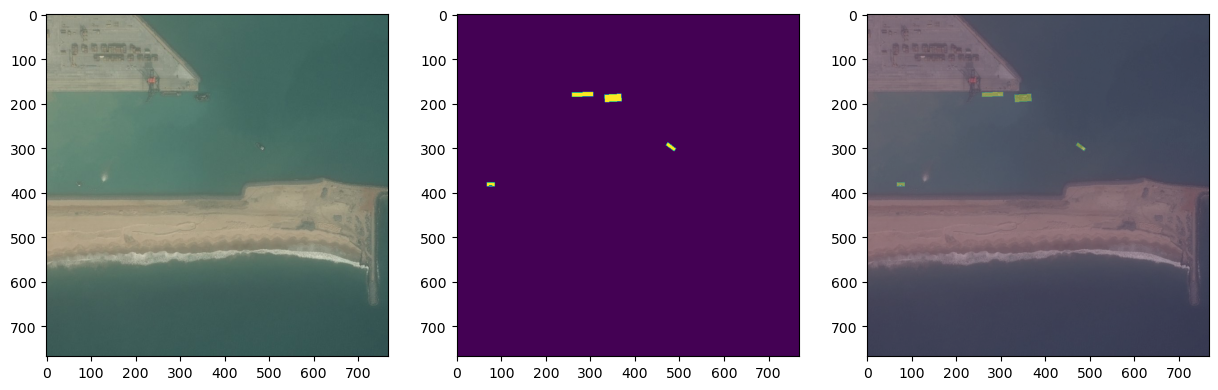

In [28]:
img = plt.imread("dataset/train_v2/" + str(new_train['ImageId'].iloc[3])) #read image
enc_pxls_array = np.array(new_train['EncodedPixels'].iloc[3].split(' ')[:-1]).astype(int) #create array with index-length values of pixel without last space symbol
enc_pxls_array = enc_pxls_array.reshape((int(len(enc_pxls_array)/2), 2)) #reshape it for right 'create_mask' function work
mask = create_mask(enc_pxls_array) #create mask

fig, axs = plt.subplots(1, 3, figsize=(15, 6))    
    
axs[0].imshow(img)
axs[1].imshow(mask)
axs[2].imshow(img, alpha=1)
axs[2].imshow(mask, alpha=0.3);

This way of preparing our data works well. So we will use it to create a final training dataset. Final training dataset will consist of two arrays: X with images with shape of 768x768x3 and Y with masks with shape of 768x768x1.

Here is an approximate data preparation function for training set:

In [31]:
from skimage.io import imread, imshow
from skimage.transform import resize
from tqdm import tqdm

def prepare_train_dataset (train_dataset_path, train_images_path, train_size=-1, image_shape=(768, 768, 3)):
    try:
        train = pd.read_csv(train_dataset_path) #read train dataset
        #if train_size isn't defined, get all train_images, else select images from 0 to train_size
        if train_size <= 0:
            train_images_titles = os.listdir(train_images_path)
        else:
            train_images_titles = os.listdir(train_images_path)[:train_size] #select all train images
    except:
        print("Incorrect values for dataset or images paths in 'prepare_train_dataset' function!")
        return 0
    
    train = train[train['ImageId'].isin(train_images_titles)] #crop train dataset if train_size > 0
    train['EncodedPixels'] = train['EncodedPixels'].fillna('No ships') #fill NaN values with string 'No ships'
    train['EncodedPixels'] = train['EncodedPixels'].apply(lambda x: str(x) + " " if x != 'No ships' else x) #add space to the and of EncodedPixels to concatenate it correctly
    train = train.groupby('ImageId').apply(sum) #groupe train dataset by image ids and concatenating EncodedPixels
    
    X = [] #create empty array for X
    Y = [] #create empty array for Y
    
    for image_title in tqdm(train_images_titles): #for each titles of train images
        img = imread(train_images_path + "/" + str(image_title))[:, :, :image_shape[2]] #read image
        #if shapes are different, resize it
        if img.shape != image_shape:
            img = resize(img, (image_shape[0], image_shape[1]), mode='constant', preserve_range=True)
        X.append(img) #add image to X array
        
        #create mask for image
        if train.loc[str(image_title)]['EncodedPixels'] != 'No ships':
            enc_pxls_array = np.array(train.loc[str(image_title)]['EncodedPixels'].split(' ')[:-1]).astype(int) #create array with index-length values of pixel sequences
            enc_pxls_array = enc_pxls_array.reshape((int(len(enc_pxls_array)/2), 2)) #reshape it for right 'create_mask' function work
            mask = create_mask(enc_pxls_array) #use this function to create image mask
            Y.append(mask)
        else:
            mask = np.zeros((img.shape[0], img.shape[1])) #create 0-mask for image without ships
            Y.append(mask)
        
    return X, Y

In [32]:
X, Y = prepare_train_dataset('dataset/train_ship_segmentations_v2.csv', 'dataset/train_v2', train_size=10)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 50.65it/s]


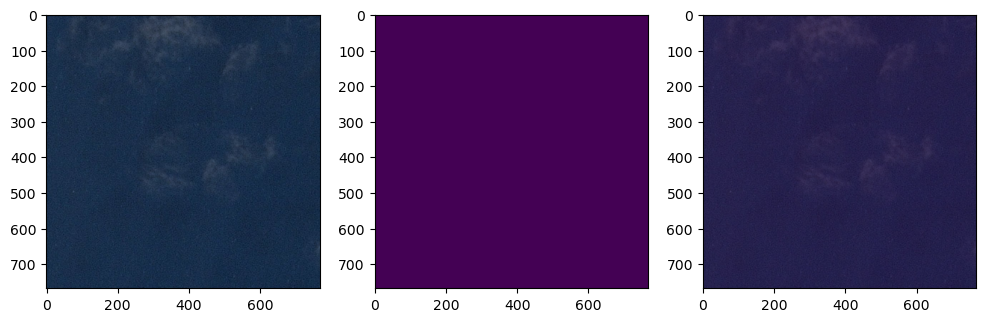

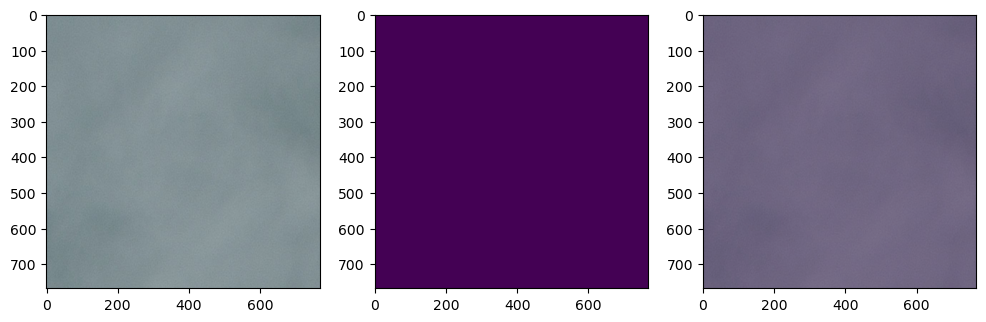

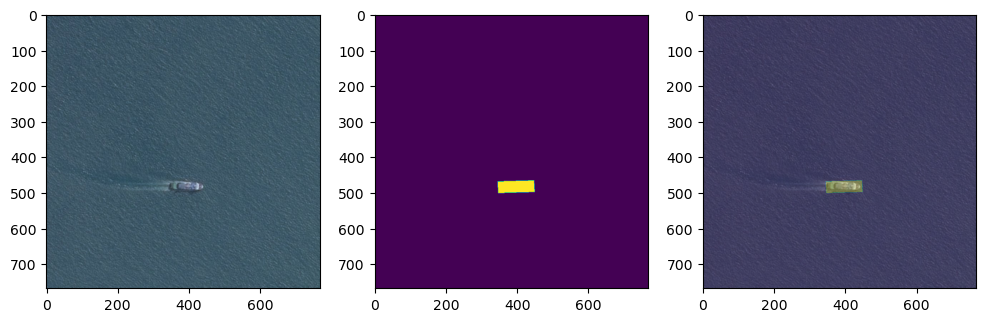

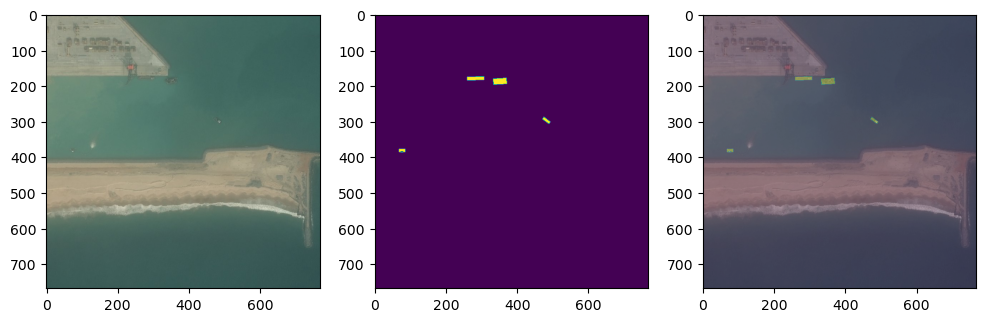

In [33]:
for ix in range(4):
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))
    axs[0].imshow(X[ix])
    axs[1].imshow(Y[ix])
    axs[2].imshow(X[ix], alpha=1)
    axs[2].imshow(Y[ix], alpha=0.3);

This function will be rewrited and upgraded in prepare.py file and it will be used in future for data prepartation. In this file we just looked at dataset structure and defined some methods of data processing. They will be very useful in our future work.